**DONNEES**

In [ ]:
!curl -O https://www.robots.ox.ac.uk/~vgg/data/fgvc-aircraft/archives/fgvc-aircraft-2013b.tar.gz
!tar xzf fgvc-aircraft-2013b.tar.gz
!mv fgvc-aircraft-2013b dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2625M  100 2625M    0     0  29.2M      0  0:01:29  0:01:29 --:--:-- 29.7M


**LIBRAIRIES**

In [ ]:
import pathlib
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import tensorflow as tf
import yaml
from PIL import Image
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [ ]:
pip freeze


absl-py==1.0.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.2.0
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.11.4
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.4.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==4.1.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.4
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.10
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.10.8
cffi==1.15.0
cftime==1.6.0
chardet==3.0.4
charset-normalizer==2.0.12
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==3.0.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.4.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.28
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distributed==

In [ ]:
pip freeze > requirements.txt

**CONSTANTES**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
yaml_file = open("/content/drive/MyDrive/yaml.txt", 'r')
yaml = yaml.load(yaml_file)

print("Key: Value")
for key, value in yaml.items():
   print(f"{key}: {value}")


Key: Value
IMAGE_WIDTH: 128
IMAGE_HEIGHT: IMAGE_WIDTH
IMAGE_DEPTH: 3
DATA_DIR_TRAIN_MANUFACTURER: /content/dataset/data/images_manufacturer_train.txt
DATA_DIR_TRAIN_FAMILY: /content/dataset/data/images_family_train.txt
DATA_DIR_TRAIN_VARIANT: /content/dataset/data/images_variant_train.txt
DATA_DIR_TEST_MANUFACTURER: /content/dataset/data/images_manufacturer_test.txt
DATA_DIR_TEST_FAMILY: /content/dataset/data/images_family_test.txt
DATA_DIR_TEST_VARIANT: /content/dataset/data/images_variant_test.txt
TARGET_NAME: manufacturer
TARGET_NAME2: family
TARGET_NAME3: variant


In [ ]:
DATA_DIR = yaml['DATA_DIR_TRAIN_FAMILY']
IMAGE_WIDTH = yaml['IMAGE_WIDTH']
IMAGE_HEIGHT = yaml['IMAGE_WIDTH']
IMAGE_DEPTH = yaml['IMAGE_DEPTH']
TARGET_NAME = yaml['TARGET_NAME']
TARGET_NAME2 = yaml['TARGET_NAME2']
TARGET_NAME3 = yaml['TARGET_NAME3']
DATA_DIR_TRAIN_MANUFACTURER = yaml['DATA_DIR_TRAIN_MANUFACTURER']
DATA_DIR_TRAIN_FAMILY = yaml['DATA_DIR_TRAIN_FAMILY']
DATA_DIR_TRAIN_VARIANT = yaml['DATA_DIR_TRAIN_VARIANT']
DATA_DIR_TEST_MANUFACTURER = yaml['DATA_DIR_TEST_MANUFACTURER']
DATA_DIR_TEST_FAMILY = yaml['DATA_DIR_TEST_FAMILY']
DATA_DIR_TEST_VARIANT = yaml['DATA_DIR_TEST_VARIANT']

In [ ]:


TARGET_NAME2 = TARGET_NAME
DATA_DIR_TRAIN_FAMILY = DATA_DIR_TRAIN_MANUFACTURER
DATA_DIR_TEST_FAMILY = DATA_DIR_TEST_MANUFACTURER

**CONSTRUCTION DE FONCTION**

In [ ]:
def build_image_database(path, target):
    """Build a pandas dataframe with target class and access path to images.
   
    Parameters
    - - - - - -
    path (Path): path patern to read csv file containing images information.
    target (str): name of the target column.
   
    Returns
    - - - - -
    A pandas dataframe, including target class and path to image.
    """
  
    _df = pd.read_csv(path, sep='\t',
            names=['all'],
            dtype={'all': str} # ids are not int but string
            )

    # la fonction split() découpe sur une chaîne de charatères
    _df['image_id'] = _df['all'].apply(lambda x: x.split(' ')[0])

    # la fonction '<car>'.join(liste) concatène les éléments de liste en utilisant le séparateur <car>
    _df[target] = _df['all'].apply(lambda x: ' '.join(x.split(' ')[1:]))

    # la colonne path contient le chemin d'accès à l'image
    _df['path'] = _df['image_id'].apply(lambda x:  pathlib.Path('dataset/data/images') / (x + '.jpg'))

    return _df.drop(columns=['all'])

In [ ]:
# application de la fonction
build_image_database(DATA_DIR_TRAIN_FAMILY, TARGET_NAME2).head()

,image_id,manufacturer,path
0,1025794,Boeing,dataset/data/images/1025794.jpg
1,1340192,Boeing,dataset/data/images/1340192.jpg
2,0056978,Boeing,dataset/data/images/0056978.jpg
3,0698580,Boeing,dataset/data/images/0698580.jpg
4,0450014,Boeing,dataset/data/images/0450014.jpg


In [ ]:
# application de la fonction
build_image_database(DATA_DIR_TRAIN_VARIANT, TARGET_NAME3).head()

,image_id,variant,path
0,1025794,707-320,dataset/data/images/1025794.jpg
1,1340192,707-320,dataset/data/images/1340192.jpg
2,0056978,707-320,dataset/data/images/0056978.jpg
3,0698580,707-320,dataset/data/images/0698580.jpg
4,0450014,707-320,dataset/data/images/0450014.jpg


In [ ]:
manufacturer_df = build_image_database(DATA_DIR_TRAIN_MANUFACTURER,TARGET_NAME)
manufacturer_df.head()

,image_id,manufacturer,path
0,1025794,Boeing,dataset/data/images/1025794.jpg
1,1340192,Boeing,dataset/data/images/1340192.jpg
2,0056978,Boeing,dataset/data/images/0056978.jpg
3,0698580,Boeing,dataset/data/images/0698580.jpg
4,0450014,Boeing,dataset/data/images/0450014.jpg


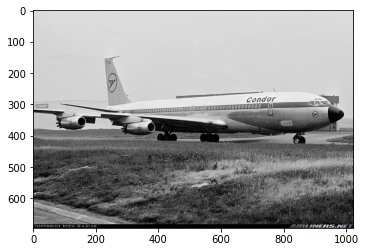

In [ ]:
plt.imshow(plt.imread(manufacturer_df.head(1)['path'].values[0]))

**FONCTION IMAGE**

In [ ]:
# La fonction :
# - prend un df (argument)
# - prend une ligne (row : argument, l'indice de la ligne)
# - prend une colonne (target : argument)
# - elle affiche la classe (la valeur de target) et l'image associée, pour la ligne en argument

def show_image(df, row, target):
  """Show an image from an image database, with the associated class.

  Parameters
  ----------
  df (pd.DataFrame): images definition dataframe
  row (int): row index in df of image to be displayed
  target (str): name of the target column

  Returns
  -------
  None
  """
  assert target in df.columns, "Missing target column in dataframe"
  assert 'path' in df.columns, "Missing image path in dataframe"
  print(df.iloc[row,][target])
  plt.imshow(plt.imread(df.iloc[row,]['path']))
  return

**FONCTION DE REDIMENSION IMAGE**

In [ ]:
def load_resize_image(path, height, width):
  """Load an image and resize it to the target size.

  Parameters
  ----------
  path (Path): access path to image file
  height (int): resize image to this height
  width (int): resize image to this width
  
  Returns
  -------
  np.array containing resized image
  """
  return np.array(Image.open(path).resize((width, height)))

**FONCTION DE CLASSIFICATION DU MODEL**

In [ ]:
def build_classification_model(df: pd.DataFrame, target: str, images: str):
  """Build a TF model using information from target and images columns in dataframe.

  Parameters
  ----------
  df (pd.DataFrame): dataframe with target and images columns
  target (str): column name for target variable
  images (str): column name for images

  Returns
  -------
  TF model built & compiled
  """
  nb_classes = df[target].nunique() # Compute number of classes for output layer
  size = df[images].iloc[0].shape # Compute images size for input layer

  #Building the model
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=size))
  model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(rate=0.25))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(rate=0.25))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(nb_classes, activation='softmax')) # output layer with nb_classes

  #Compilation of the model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

**TRAIN et TEST**

In [ ]:
def build_x_and_y(df:pd.DataFrame,target:str,images:str,stratify=None):
  """Build x tensor and y tensor for model fitting 

  Parameters
  --------------
  df(pd.DataFrame):dataframe contanining images and target
  target(str):name of target column
  images(str): name of images column
  
  Returns
  ---------
  x(np.array):tensor of x values
  y(np.array):name of y values
  """
  x=np.array(df[images].to_list())
  y= tf.keras.utils.to_categorical(df[target].astype('category').cat.codes)
  y_s = np.array(df[target].astype("category").cat.codes)
 

  return x, y, y_s

In [ ]:
# Load train & test dataset

train_df= build_image_database(DATA_DIR_TRAIN_FAMILY,TARGET_NAME2)
test_df= build_image_database(DATA_DIR_TEST_FAMILY,TARGET_NAME2)

train_df['resized_image']=train_df.apply(lambda r:load_resize_image(r['path'],IMAGE_HEIGHT,IMAGE_WIDTH),axis=1)

test_df['resized_image']=test_df.apply(lambda r:load_resize_image(r['path'],IMAGE_HEIGHT,IMAGE_WIDTH),axis=1)
#train_df
# Build tensors for training & testing

X_train,y_train,y_train_s = build_x_and_y(train_df,TARGET_NAME2,'resized_image')
X_test,y_test,y_test_s = build_x_and_y(test_df,TARGET_NAME2,'resized_image')

# BUILD TF classification model
model = build_classification_model(train_df,TARGET_NAME2,'resized_image')


In [ ]:
# A faire une fois pour récupérer les informations sur la TPU

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Running on TPU  ['10.66.224.146:8470']
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.66.224.146:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.66.224.146:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
with tpu_strategy.scope():
  model= build_classification_model(train_df, TARGET_NAME2, 'resized_image')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 124, 124, 32)      2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 120, 120, 32)      25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 60, 60, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 58, 58, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 64)        36928     
                                                      

In [ ]:
%%time
epochs = 30
history = model.fit(X_train, y_train, batch_size=96, epochs=epochs, 
                    validation_data=(X_test, y_test),
                    #callbacks=[tensorboard_callback]
                    )

Epoch 1/30
35/35 [==============================] - 40s 829ms/step - loss: 33.2780 - accuracy: 0.1290 - val_loss: 3.3594 - val_accuracy: 0.2178
Epoch 2/30
35/35 [==============================] - 3s 83ms/step - loss: 3.0198 - accuracy: 0.1971 - val_loss: 3.3343 - val_accuracy: 0.2181
Epoch 3/30
35/35 [==============================] - 3s 83ms/step - loss: 2.9823 - accuracy: 0.2046 - val_loss: 3.2183 - val_accuracy: 0.2124
Epoch 4/30
35/35 [==============================] - 3s 87ms/step - loss: 2.9255 - accuracy: 0.2133 - val_loss: 3.1682 - val_accuracy: 0.2100
Epoch 5/30
35/35 [==============================] - 3s 86ms/step - loss: 2.8521 - accuracy: 0.2028 - val_loss: 2.8502 - val_accuracy: 0.2196
Epoch 6/30
35/35 [==============================] - 3s 88ms/step - loss: 2.7005 - accuracy: 0.2412 - val_loss: 2.7192 - val_accuracy: 0.2244
Epoch 7/30
35/35 [==============================] - 3s 90ms/step - loss: 2.5091 - accuracy: 0.2654 - val_loss: 2.6574 - val_accuracy: 0.2340
Epoch 8/30

In [ ]:
# the probabilty of prediction of X_test[10:11]
model.predict(X_test[10:11])

array([[4.20207187e-04, 2.43850537e-02, 5.72430530e-08, 2.23820351e-07,
        8.42322588e-01, 1.00599857e-06, 1.56801798e-05, 1.20346555e-02,
        5.86887609e-06, 1.66765716e-07, 1.05280186e-07, 1.56921044e-06,
        2.03724261e-02, 1.11652585e-02, 1.01078022e-05, 2.06201403e-05,
        9.09037699e-05, 5.37682574e-08, 8.77004186e-06, 6.44498854e-04,
        2.22554121e-07, 8.80146548e-02, 1.22961183e-06, 1.00781543e-08,
        1.71398381e-06, 4.97979545e-06, 1.96658423e-09, 4.58247436e-04,
        1.73984517e-05, 1.82267445e-06]], dtype=float32)

In [ ]:
test_df[TARGET_NAME2].astype('category').cat.codes

0        4
1        4
2        4
3        4
4        4
        ..
3328    28
3329    28
3330    28
3331    28
3332    28
Length: 3333, dtype: int8

In [ ]:
test_df[TARGET_NAME2]

0         Boeing
1         Boeing
2         Boeing
3         Boeing
4         Boeing
          ...   
3328    Yakovlev
3329    Yakovlev
3330    Yakovlev
3331    Yakovlev
3332    Yakovlev
Name: manufacturer, Length: 3333, dtype: object

Boeing


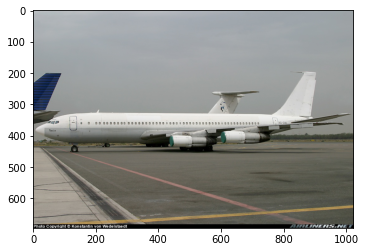

In [ ]:
show_image(test_df, 10, TARGET_NAME2)

In [ ]:
train_df[TARGET_NAME2].astype('category').cat.categories

Index(['ATR', 'Airbus', 'Antonov', 'Beechcraft', 'Boeing',
       'Bombardier Aerospace', 'British Aerospace', 'Canadair', 'Cessna',
       'Cirrus Aircraft', 'Dassault Aviation', 'Dornier',
       'Douglas Aircraft Company', 'Embraer', 'Eurofighter', 'Fairchild',
       'Fokker', 'Gulfstream Aerospace', 'Ilyushin', 'Lockheed Corporation',
       'Lockheed Martin', 'McDonnell Douglas', 'Panavia', 'Piper', 'Robin',
       'Saab', 'Supermarine', 'Tupolev', 'Yakovlev', 'de Havilland'],
      dtype='object')

**CLASSIFICATION IMAGE**

In [ ]:
def classify_images(images, model, classes_names=None):
  """Classify images through a TF model.

  Parameters
  ----------
  images (np.array): set of images to classify
  model (tf.keras.Model): TF/Keras model
  classes_names: dictionary with names of classes

  Returns
  -------
  predicted classes
  """

  results = model.predict(images) # predict for images
  classes = np.argmax(results, axis=1) # argmax returns the index of the max value per row
  if classes_names is not None:
    classes = np.array(classes_names[classes])
  return classes

In [ ]:
classify_images(X_test, model).shape

(3333,)

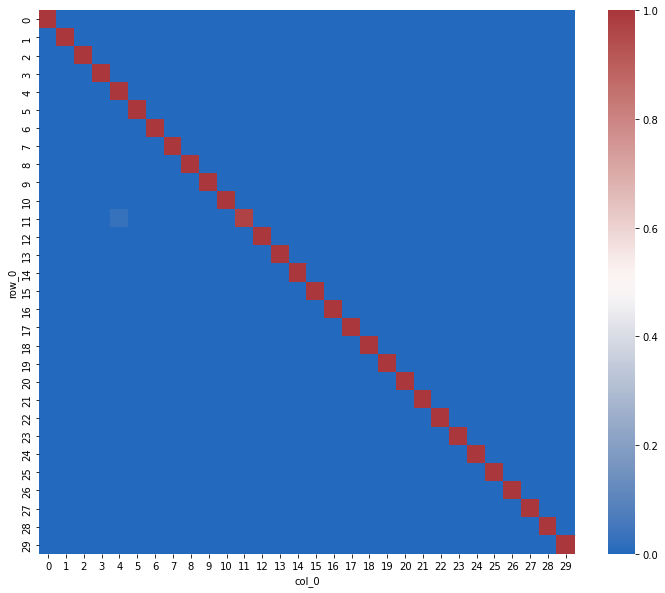

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(pd.crosstab(np.argmax(y_train, axis=1), 
                        classify_images(X_train, model), 
                        normalize='index'),
            cmap='vlag',
            ax=ax)

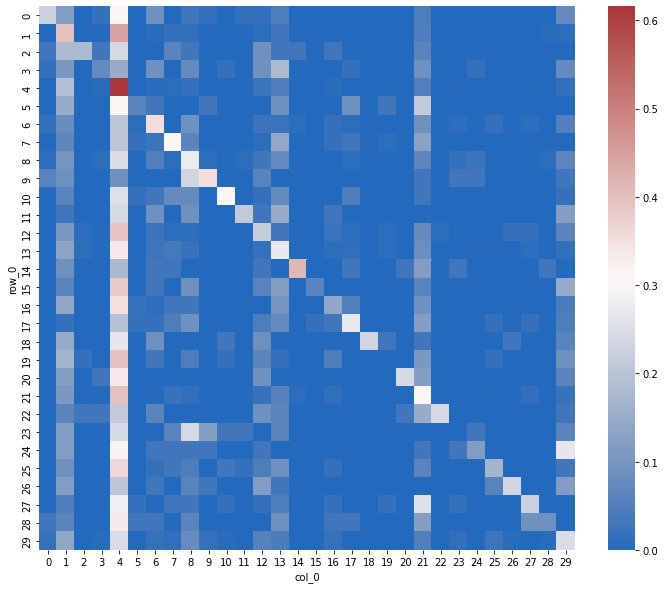

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(pd.crosstab(np.argmax(y_test, axis=1),
                        classify_images(X_test, model),
                        normalize='index'),
            cmap='vlag',
            ax=ax)

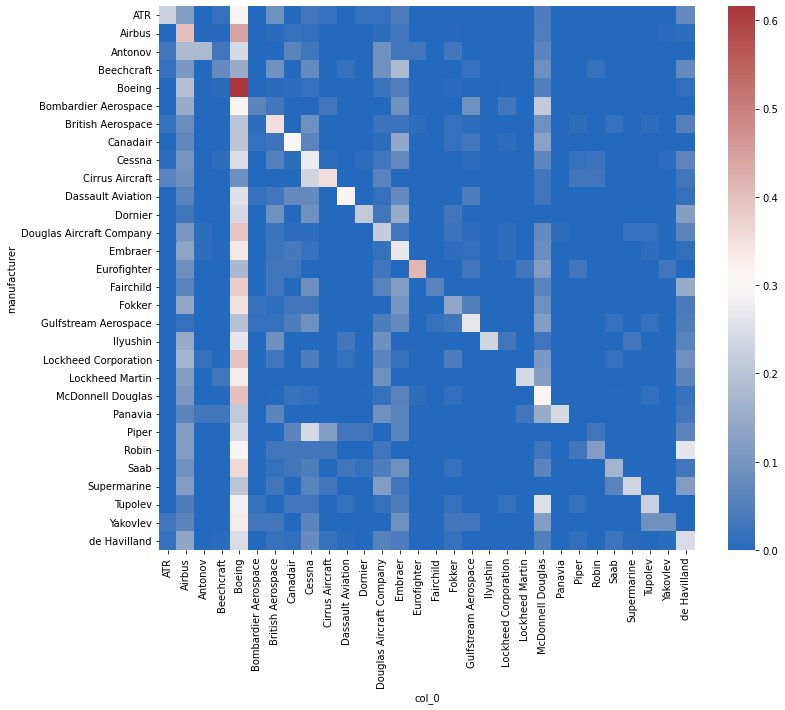

In [ ]:

fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(pd.crosstab(test_df[TARGET_NAME2], 
                        classify_images(X_test, model, test_df[TARGET_NAME2].astype('category').cat.categories), 
                        normalize='index'),
            cmap='vlag',
            ax=ax)

In [ ]:
import datetime

def save_model(model, basename):
  """Save tf/Keras model.

  Model file is named model + timestamp.

  Parameters
  ----------
  model (tf/Keras model): model to be saved
  basename: location to save model file
  """
  model.save('{}_{}.h5'.format(basename, datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')))
  return

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
save_model(model, TARGET_NAME2)